<h1 style="color:rgb(0,120,170)">Cluster Analysis</h1>

<h3 style="color:rgb(0,120,170)">Task 1 (60 points):</h3> 

Complete the implementation of the $k$-means algorithm using the provided skeleton. 

You will have to implement:
* a) Initialization of the centers of the clusters
* b) Distance measure (Euclidean)
* c) Cluster assignment and loss computation
* d) Cluster center computation (mean and median)
* e) Convergence criterion function taking into account maximum number of iterations and changes in the clusters assignments
* f) Core part of the algorithm in the ```fit``` function

Plotting functions are provided.

You can of course ignore the (overly complicated) skeleton and implement your own version of plotting functions and the $k$-means algorithm as long as the requirements 'a' to 'f' are fulfilled and the questions are correctly answered.

Use the data given in `cluster0.csv`. The third column of the data are the labels. Use them only to compare original labeling and results of the algorithm.

Tasks:
* 1a: Run with different numbers of clusters from $k=3$ to $k=7$, using "mean" for the cluster center computation. Plot results and report loss value after convergence.
* 1b: For $k=5$, after each iteration, plot cluster assignments and report loss value.
* 1c: Run with two different methods of computing the centers of the clusters (mean and median). Additionally, for $k=4$ to $k=7$, plot the evolution of the loss across iterations until convergence.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil, sqrt

In [2]:
class KMeansClustering:
    '''
    K-Means clustering implementation
    '''
    def __init__(self, k=2, dist='Euclidean', method = 'mean'):
        '''
        Class constructor
        @param int k: Number of clusters to generate (default 2)
        @param string dist: Distance measure (default 'Euclidean')
        @param string method: Measure to compute the center of the clusters (default 'mean')
        '''
        self.k = k
        self.dist = dist
        self.center_method = method
        self.max_iter = 30
        self.old_loss = 0 # For the convergence criteria
        
       
    def convergence(self, i, n_changes, max_iter):
        '''
        Checks the convergence criteria
        Returns true if a convergence condition is reached, false otherwise
        @param int i: current iteration
        @param int n_changes: number of datapoints that changed the cluster assignment in the last iteration
        @param int max_iter: maximum number of iterations
        '''
        # Implement your own version of convergence taking into account:
        # Return "true", if maximum number of iterations is reached or no datapoints changed after the last cluster assignment
# TO DO
        return i >= max_iter or n_changes == 0
# END TO DO


    def center_initialization(self):
        
        '''
        Initializes the centers by creating them randomly within the feature space (use maxes and mins)
        Uses self.d for the dimensionality of the data
        Uses self.k for the number of clusters
        Uses self.centers[i,j] for the dimension "j" of the cluster "i"
        '''
        # Max and min feature values
        maxes = np.amax(self.dataset, axis=0)
        mins = np.amin(self.dataset, axis=0)
        
# TO DO
        for i in range(self.k):
            for j in range(self.d):
                self.centers[i, j] = np.random.uniform(mins[j], maxes[j])
# END TO DO


    def distance(self, s1, s2, dist='Euclidean'):
        '''
        Returns the distance between two given samples for a given distance measure (dist='Euclidean')
        @param array s1: data point 1
        @param array s2: data point 2
        @param string dist: distance measure
        '''

        if len(s1) == len(s2):
# TO DO
            if dist == 'Euclidean':
                return np.linalg.norm(s1 - s2)
            elif dist == 'Manhattan':
                return np.sum(np.abs(s1 - s2))
# END TO DO


    def assign_clusters(self):

        '''
        Computes to which cluster each sample currently belongs to 
        Adds the distance to the loss
        Returns number of newly assigned labels (new_assigned) and the loss (eq. 1 in exercise slides)
        '''
        old_labels = list(self.labels)
        loss = 0
        # Compute distance for each datapoint with respect to the centers.
        # Use self.dataset for the dataset
        # Assign the new clusters for a sample taking the min distance to the centers.
        # Use self.labels[i] for the current cluster of the i-th sample
        # Add the quadratic distance to the loss
# TO DO
        for i in range(len(self.dataset)):
            dists = np.asarray([self.distance(k, self.dataset[i], self.dist) for k in self.centers])

            k = dists.argmin(axis=0)
            self.labels[i] = k

            loss += dists[k] ** 2
# END TO DO           
        # Here we save labels and centers for plotting each iteration    
        if self.plot_steps: 
            self.clust_hist.append(np.copy(self.labels))
            self.center_hist.append(np.copy(self.centers))
        return [np.sum(old_labels != self.labels),loss]


    def compute_centers(self):

        '''
        Computes new cluster centers according to the current samples in each cluster
        
        '''
        # After the call of this function, self.centers[i] should contain the center of the i-th cluster 
        # self.center_method defines the way of computing the centers (values: 'mean' or 'median')
# TO DO
        for i in range(self.k):
            Xi = self.dataset[self.labels == i]
            if len(Xi) != 0:
                if self.center_method == "mean":
                    self.centers[i] = np.mean(Xi, axis=0)
                elif self.center_method == "median":
                    self.centers[i] = np.median(Xi, axis=0)
# END TO DO

            
    def fit(self, dataset, labels=None, plot='plot_all', max_iter=10):
        '''
        Fits the model to the input dataset. 
        Stops by using the function self.convergence()
        @param np.array dataset matrix of feature vectors (samples, features)
        @param array labels: the actual labels, if known; used to compare the estimated result with the real one
        @param string plot: plot all iterations or after convergence or nothing ('plot_all', 'plot_convergence', 'none') 
        @param maxiter: number of maximum iterations
        @return float loss: the loss after convergence
        '''
        self.dataset = dataset
        self.plot_steps = plot
        self.labels_actual = labels
        # Save intermediate solutions if we have to plot them later
        self.clust_hist = []
        self.center_hist = []
        self.labels = np.zeros(dataset.shape[0])
        # Sample dimensionality
        self.d = dataset.shape[1]
        # Randomize centers
        self.centers = np.zeros((self.k, self.d)) 
        self.center_initialization()
        self.loss_hist = [] # List that stores the evolution of the loss across iterations
        # While not converged, assign clusters, get loss, and compute new centers
# TO DO
        for i in range(max_iter):
            n_changes, loss = self.assign_clusters()
            self.loss_hist.append(loss)
            self.compute_centers()

            if self.convergence(i, n_changes, self.max_iter):
                break
# END TO DO
        if self.plot_steps=='plot_all':
            self.plot_substeps()
        elif self.plot_steps=='plot_convergence':
            self.plot_convergence()
        elif self.plot_steps=='none':
            return loss
        else:
            plot_dataset(self.dataset, self.labels, self.centers)
        print("Final loss: {}".format(loss))
        return loss

    
    def plot_convergence(self):
        '''
        Plots only the original and results after convergence
        '''
        xfmax = np.max(self.dataset[:,0]) + 0.1
        xfmin = np.min(self.dataset[:,0]) - 0.1
        yfmax = np.max(self.dataset[:,1]) + 0.1
        yfmin = np.min(self.dataset[:,1]) - 0.1
        fig, ax = plt.subplots(1, 2)
        fig.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.suptitle('K-means algorithm results ({:d} clusters, {:s} distance, method {:s})'.format(
            self.k,self.dist, self.center_method),
                    fontsize=12)
        # Plot original dataset first
        ax[0].set_xlim([xfmin, xfmax])
        ax[0].set_ylim([yfmin, yfmax])
        ax[0].set_aspect('equal')
        ax[0].set_title('Original dataset')
        if self.labels_actual is not None:
            subsets = split_labeled_set(self.dataset, self.labels_actual)
            for label, subset in subsets.items():
                ax[0].scatter(subset[:,0], 
                                subset[:,1], 
                                label='c={:d}'.format(int(label)))
        else:
            ax[0].scatter(self.dataset[:,0], self.dataset[:,1])
        s = [50 for _ in range(self.k)] # Center sizes
        
        last_iter = len(self.clust_hist)-1
        subsets = split_labeled_set(self.dataset, self.clust_hist[last_iter])
        for label, subset in subsets.items():
            ax[1].scatter(subset[:,0], subset[:,1], label='c={:d}'.format(int(label)))
        ax[1].scatter(self.center_hist[last_iter][:,0], 
                        self.center_hist[last_iter][:,1], 
                        c='k', 
                        marker='x', 
                        s=s)
        ax[1].set_xlim([xfmin, xfmax])
        ax[1].set_ylim([yfmin, yfmax])
        ax[1].set_xlabel('x1')
        ax[1].set_ylabel('x2')
        ax[1].set_aspect('equal')
        ax[1].set_title('Iteration {:d}'.format(int(last_iter+1)))
        
        plt.show()
        
    
    def plot_substeps(self):
        '''
        Plots all substeps (cluster computations) to reach the solution
        '''
        total_steps = len(self.clust_hist)
        if (total_steps > 15):
            print("Too many steps to plot. Please run the program again")
            plot_dataset(self.dataset, self.labels, self.centers, 
                         'k-means: Labeling after {:d} steps'.format(total_steps) + 
                         '\n(too many steps to show, run the program again)')
            return
        n_cols = 2
        n_rows = max(2, ceil((len(self.clust_hist)+1)/n_cols))
        xfmax = np.max(self.dataset[:,0]) + 0.1
        xfmin = np.min(self.dataset[:,0]) - 0.1
        yfmax = np.max(self.dataset[:,1]) + 0.1
        yfmin = np.min(self.dataset[:,1]) - 0.1
        #fig, ax = plt.subplots(n_rows, n_cols, figsize=( 2*n_rows,n_cols*2*n_rows))
        fig, ax = plt.subplots(n_rows, n_cols, figsize=(5,3.5*n_rows))
        fig.tight_layout()
        plt.subplots_adjust(top=0.95)
        plt.suptitle('K-means algorithm substeps ({:d} clusters, {:s} distance, method: {:s})'.format(
            self.k,self.dist, self.center_method),
                    fontsize=12)
        # Plot original dataset first
        ax[0,0].set_xlim([xfmin, xfmax])
        ax[0,0].set_ylim([yfmin, yfmax])
        ax[0,0].set_aspect('equal')
        ax[0,0].set_title('Original dataset')
        if self.labels_actual is not None:
            subsets = split_labeled_set(self.dataset, self.labels_actual)
            for label, subset in subsets.items():
                ax[0,0].scatter(subset[:,0], 
                                subset[:,1], 
                                label='c={:d}'.format(int(label)))
        else:
            ax[0,0].scatter(self.dataset[:,0], self.dataset[:,1])
        s = [50 for _ in range(self.k)] # Center sizes
        # Iterate through steps and plot labeled dataset
        i = 0
        cur_iter = 0
        while(cur_iter < n_rows*n_cols-1):
            j = 1 if i == 0 else 0
            while j < n_cols:
                if cur_iter < total_steps:
                    subsets = split_labeled_set(self.dataset, self.clust_hist[cur_iter])
                    for label, subset in subsets.items():
                        ax[i,j].scatter(subset[:,0], subset[:,1], label='c={:d}'.format(int(label)))
                    ax[i,j].scatter(self.center_hist[cur_iter][:,0], 
                                    self.center_hist[cur_iter][:,1], 
                                    c='k', 
                                    marker='x', 
                                    s=s)
                    ax[i,j].set_xlim([xfmin,xfmax])
                    ax[i,j].set_ylim([yfmin,yfmax])
                    ax[i,j].set_xlabel('x1')
                    ax[i,j].set_ylabel('x2')
                    ax[i,j].set_aspect('equal')
                    ax[i,j].set_title('Iteration {:d}'.format(int(cur_iter+1)))
                    #ax[i,j].legend(loc='upper right')
                else:
                    ax[i,j].axis('off')
                j += 1
                cur_iter += 1
            i += 1
        plt.show()
        
        plt.plot(self.loss_hist,label='loss') # plotting by columns
        plt.title('Loss vs number of iterations')
        plt.show()

In [3]:
def split_labeled_set(X, y):
    '''
    Given a two-dimensional multiclass labeled dataset, with n classes, returns n single-class subsets
    @return dict: a dictionary with labels in its keys and subsets (matrices) for the given label in its values
    '''
    if X.shape[1] != 2:
        raise Exception("Can only plot two-dimensional datasets")
    labels = set(y)
    subsets = {}
    for l in labels:
        indices = np.where(y == l)[0]
        subset_x1 = X[:,0][indices]
        subset_x2 = X[:,1][indices]
        subset = np.column_stack((subset_x1, subset_x2))
        subsets[l] = subset
    return subsets

In [4]:
def plot_dataset(features, labels, centers=None, title=''):
    subsets = split_labeled_set(features, labels)
    for label, subset in subsets.items():
        plt.scatter(subset[:,0], subset[:,1], label='cluster {:d}'.format(int(label)))
    if centers is not None:
        s = [50 for _ in range(len(labels))]
        plt.scatter(centers[:,0], centers[:,1], c='k', marker='x', s=s)
    plt.legend()
    
    xfmax = np.max(features[:,0]) + 0.5
    xfmin = np.min(features[:,0]) - 0.5
    yfmax = np.max(features[:,1]) + 0.5
    yfmin = np.min(features[:,1]) - 0.5
    plt.xlim(xfmin, xfmax)
    plt.ylim(yfmin, yfmax)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.show()

In [5]:
# Load data and create the run function
data = np.loadtxt(open('cluster0.csv', 'r'), delimiter=',', skiprows=1)

X = data[:, :2] # Matrix of feature vectors
y = data[:, -1] # Target values (labels)
loss = 0

def run(k,dist,plot,method):
    '''
        Runs the algorithm.
        Returns the loss of the last iteration, and a list with the losses per iteration (for the last trial)
        @param int k: number of clusters
        @param string dist: distance measure ('Euclidean', 'Manhattan')
        @param string plot: what to plot ('plot_convergence', 'plot_all')
        @param int n_tries: number of trials 
        @param string method: method to compute the centers of the cluster 
    '''
    kmeans = KMeansClustering(k,dist,method)
    # Run k-means and plot intermediate steps
    loss = kmeans.fit(X, y, plot)
    return [loss,kmeans.loss_hist]

<h3 style="color:rgb(0,120,170)">Task 1a:</h3>

Run the algorithm for different numbers of clusters ($k$ = 3, 4, 5, 6 and 7) using the mean to compute the centers of the clusters.

For each $k$, plot the original labels and the results after convergence. Report also the final loss.

Questions:

* What do you observe?
* How does the final loss change using different $k$? Why?
* Do you get the same results if you run again? Why?


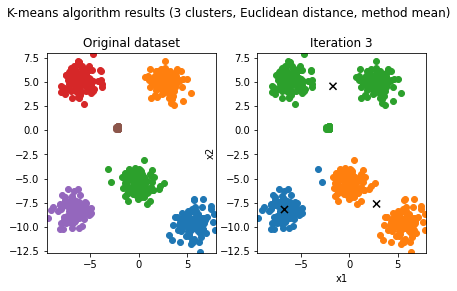

Final loss: 7702.731491900494


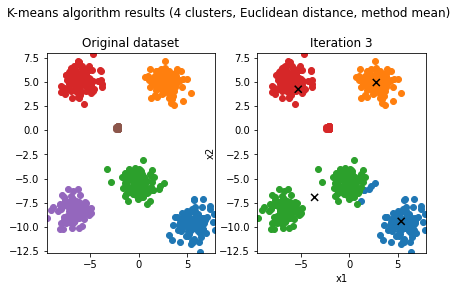

Final loss: 4276.116299167891


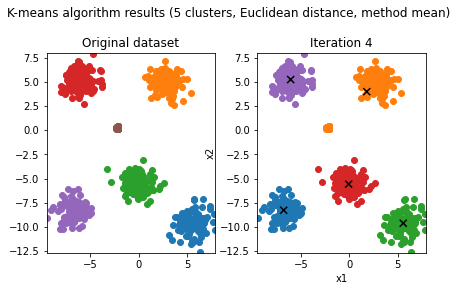

Final loss: 1804.1320359476304


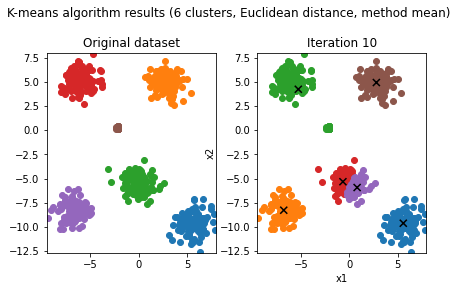

Final loss: 1624.976437857831


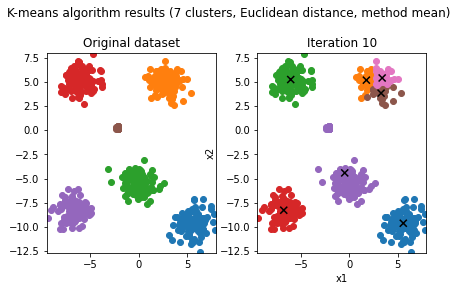

Final loss: 1529.0720408666161


In [6]:
# Begin your code

for k in range(3,8):
    run(k, 'Euclidean', 'plot_convergence', 'mean')
    
    
# End your code

<h3 style="color:rgb(208,90,80)">Question 1a:</h3>

**What do you observe?**: The Data has 5 big clusters and 1 small cluster in the middle. With k=5 we get a pretty good result, however the small cluster in the middle is never appropriately covered by a cluster center.

**How does the final loss change using different  𝑘 ? Why?**: The final loss decreases with higher values of k, because with more clusters centers, the algorithm can make up tighter clusters, and reduces the loss.

**Do you get the same results if you run again? Why?**: No, we get different results for every new execution, since the algorithm is initialized with random values. As a consequence we end up in different local minimas with gradient descent.

<h3 style="color:rgb(0,120,170)">Task 1b:</h3>

For $k=5$, plot cluster assignments and loss value after each iteration.

Question:
* What do you observe?

We can see that the algorithm is converging very fast, after only 3 iterations the overall structure and clusters centers are made up and in the last iterations only minor changes happen

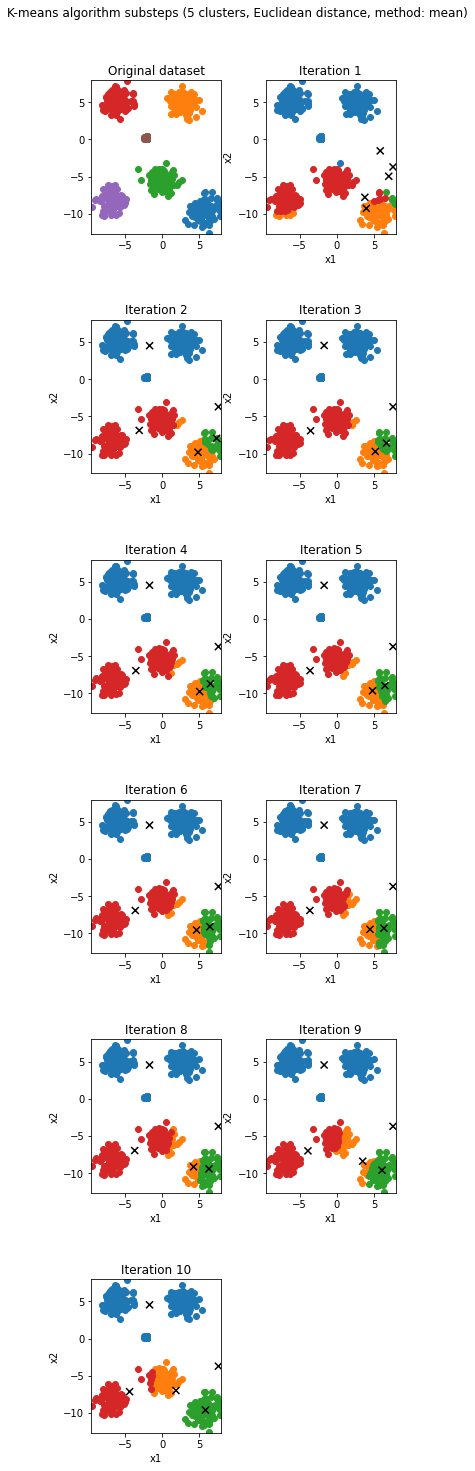

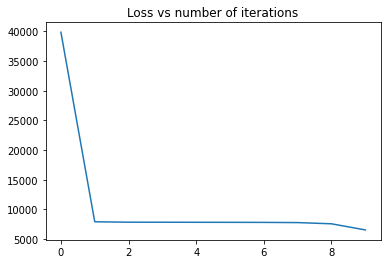

Final loss: 6553.395754829569


[6553.395754829569,
 [39872.9611183935,
  7927.317970012046,
  7855.6777115588575,
  7848.917417558392,
  7838.744522387312,
  7832.211133481867,
  7822.215669910599,
  7788.712413679474,
  7585.055704350075,
  6553.395754829569]]

In [10]:
# Begin your code

run(5, 'Euclidean', 'plot_all', 'mean')


# End your code

<h3 style="color:rgb(208,90,80)">Question 1b:</h3>

We can see that the algorithm is converging very fast, after only 3 iterations the overall structure and clusters centers are made up and in the last iterations only minor changes happen

<h3 style="color:rgb(0,120,170)">Task 1c:</h3>
 

This task will show how two different methods of computing the center (mean and median) affect the loss during iterations. To that end, run the algorithm and store the evolution of the loss per iteration for both methods.

Because the $k$-means algorithm is very sensitive to the initialization of the centers, repeat the process 100 times (100 trials) -- 1000 if you have the computing power --, and compute the loss average over all trials for each iteration and each method. To take into account that each trial might need a different number of iterations to converge. In such a case, pad the sequence with the converged value (the last value).

Plot the average loss versus iteration number for both the mean and the median method, using $k$ = 2, 5 and 8.

Question:
* What do you observe?



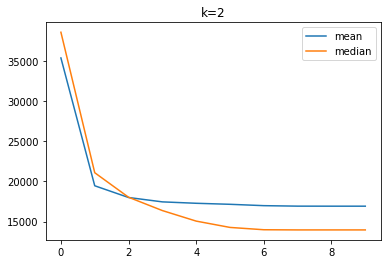

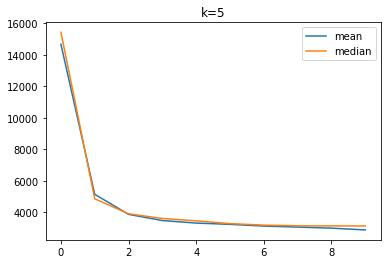

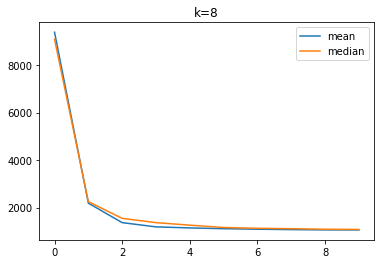

In [8]:
itr = 100
ks = [2,5,8]
longest_list = 10

mean_loss = []
median_loss = []

for method in ["mean", "median"]:
    for k in ks:
        loss = [run(k, "Euclidean", 'none', method) for _ in range(itr)]
        
        # create a numpy array with shape (itr, longest,list)
        loss_lists = np.zeros(shape=(itr, longest_list))
        
        # pad lists with last element if < longest list
        for idx, row in enumerate(loss_lists):
            last_idx = len(loss[idx][1])
            loss_lists[idx, :last_idx] += loss[idx][1]
            
            last_value = row[last_idx-1]
            loss_lists[idx, loss_lists[idx] == 0] = last_value
        
        #insert into list
        if method == "mean":
            mean_loss.append(np.mean(loss_lists, axis=0))
        elif method == "median":
            median_loss.append(np.mean(loss_lists, axis=0))
            
for idx, k in enumerate(ks):
    plt.title(f"k={k}")
    plt.plot(range(longest_list), mean_loss[idx], label="mean")
    plt.plot(range(longest_list), median_loss[idx], label="median")
    plt.legend()
    plt.show()

<h3 style="color:rgb(208,90,80)">Question 1c:</h3>

For k=2 the median leads to a better result. For k=5 the mean now yields a better convergence and for the last example k=8, its hard to spot a difference.

<h3 style="color:rgb(0,120,170)">Task 2 (40 points):</h3> 

Use the data given in `cluster1.csv`, `cluster2.csv`, `cluster3.csv` and `cluster4.csv` to compare affinity propagation clustering with $k$-means clustering. Omit the third column of each data set since it contains the labels. Use $k = 2,3,4$ for $k$-means and plot your results. 

For affinity propagation you can use `AffinityPropagation` from `sklearn.cluster`. Use the default method ``affinity = euclidean`` (note that this is the negative squared Euclidean distance). For the preference, try the negative squared minimum, negative squared median, and negative squared maximum distance of the data points.

For the $k$-means algorithm you can either use your own implementation from Task 1 or use `KMeans` from `sklearn.cluster`. In any case, keep using the (standard) Euclidean distance.

Use the provided labels to determine which algorithm and which number of clusters give better results on a specific data set and explain why one algorithm might have an advantage over the other one.

Questions:
* Which method is faster?
+ KMeans is faster than Affinity Propagation


* Which method performs best in each dataset?
+ data_set 1: kmeans with k=3  
+ data_set 2: kmeans with k=3 or k=4
+ data_set 3: kmeans with k=4
+ data_set 4: None of the results are really satisfying, the best one is maybe AP with preference=-9.62  


* Is any dataset not "solved" by the $k$-means or Affinity Propagation? Why? Which parameters could be modified for improvement?
The first dataset could not be solved by Affinity Propagation for lower preference values. Two approches to solve the issues:
1) normalize the data, such that the distance matrix has lower values  
2) increase the preference value in general


data_set 1


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_affinity_propagation.py:247: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_affinity_propagation.py:247: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


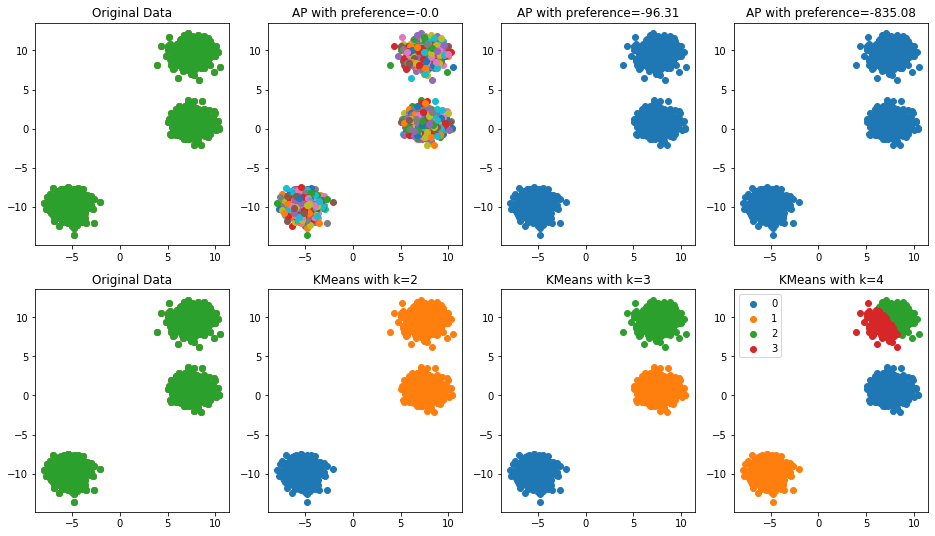


data_set 2


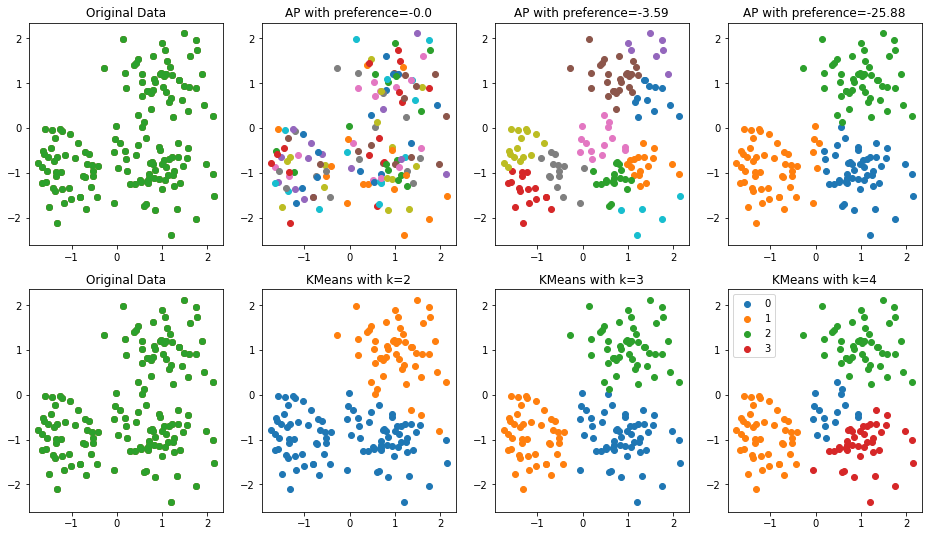


data_set 3


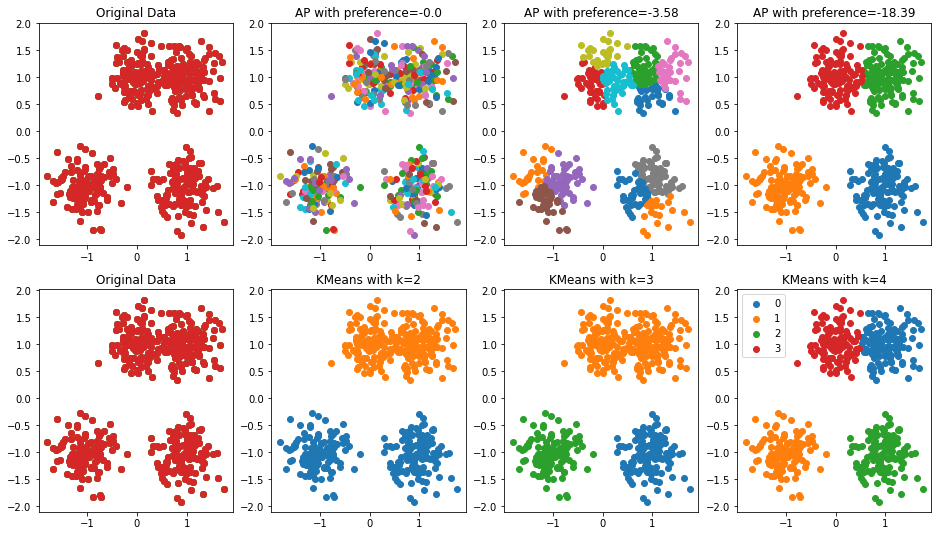


data_set 4


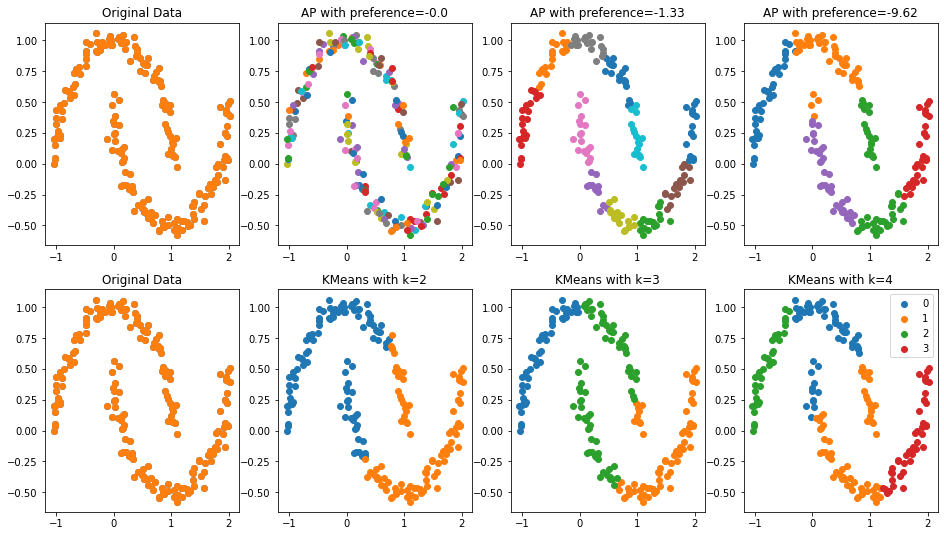

In [11]:
# Begin your code (multiple cells)
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix

data_sets = []

for i in range(1, 5):
    data = np.loadtxt(f'cluster{i}.csv', delimiter=',')
    data_sets.append(data)

for idx, data_set in enumerate(data_sets):
    print()
    print(f"data_set {idx+1}")
    
    # prepare dataset
    X = data_set[:, :2]
    y = data_set[:, 2]
    split_data = split_labeled_set(X, y)
    
    # calculate distances (minimum, median, maximum)
    distances = distance_matrix(X, X)
    negative_squared_minimum = -np.amin(distances, where=(distances>0), initial=100)**2
    negative_squared_median = -np.median(distances)**2
    negative_squared_maximum = -np.amax(distances)**2
    
    # create "grid search"
    ks = [2,3,4]
    preferences = [negative_squared_minimum, negative_squared_median, negative_squared_maximum]
    
    # create 2x4 figure to plot
    fig, axs = plt.subplots(2, 4, figsize=(16,9))
    
    # plot original data
    for target in split_data:
        axs[0,0].set_title(f'Original Data')
        axs[1,0].set_title(f'Original Data')
        axs[0,0].scatter(X[:, 0], X[:, 1], label=target)
        axs[1,0].scatter(X[:, 0], X[:, 1], label=target)
            
    # plot cluster alorithms
    for i in range(3):
        y_affinity = AffinityPropagation(preference=preferences[i], random_state=42).fit_predict(X)
        y_kmeans = KMeans(n_clusters=ks[i]).fit_predict(X)
        
        split_data_affinity = split_labeled_set(X, y_affinity)
        split_data_kmeans = split_labeled_set(X, y_kmeans)
        
        for target in split_data_affinity.keys():
            axs[0,i+1].set_title(f'AP with preference={round(preferences[i], 2)}')
            axs[0,i+1].scatter(split_data_affinity[target][:, 0], split_data_affinity[target][:, 1], label=target)
            
        for target in split_data_kmeans.keys():
            axs[1,i+1].set_title(f'KMeans with k={ks[i]}')
            axs[1,i+1].scatter(split_data_kmeans[target][:, 0], split_data_kmeans[target][:, 1], label=target)
    
    plt.legend()
    plt.show()

In [ ]:
# End your code (multiple cells)

<h3 style="color:rgb(208,90,80)">Question 2:</h3>

Your answer here.